<a href="https://colab.research.google.com/github/avanish04/online-retail-customer-segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# Importing Dataset and important libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import math
import datetime as dt
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [3]:
#importing dataset
dataset= pd.read_excel('/content/drive/MyDrive/Capstone projects/Customer segmentation /Copy of Online Retail.xlsx')

# Cleaning of Data


In [4]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
dataset.shape

(541909, 8)

**Dataset contains 8 features and 541909 observations**

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**From the above result we can see that CustomerID and Description feature contain some null values. In this scenerio we have to drop these observations because we can not fill them randomly.**

In [7]:
# dropping nan values
dataset.dropna(inplace= True)

In [8]:
dataset.shape

(406829, 8)

**After removing the NaN values now, Dataset has 406829 observations left.**

**As given in the problem statement which invoiceNo contain 'c'(which means cancelled), then we have to drop these observations also.**

In [9]:
dataset['InvoiceNo']=dataset['InvoiceNo'].astype('str')
dataset=dataset[~dataset['InvoiceNo'].str.contains('C')]

In [10]:
dataset.shape

(397924, 8)

**At the end, after removing observations contain cancelled order, now dataset have 397924 observations.**




# EDA

In [ ]:
dataset.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
dataset.describe(percentiles=[.25, .50, .75, .95,.99])

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
95%,36.000000,8.500000,17912.000000
99%,120.000000,14.950000,18211.000000
max,80995.000000,8142.750000,18287.000000


**from the above we can say that Quantity and unitprice contain outliers**

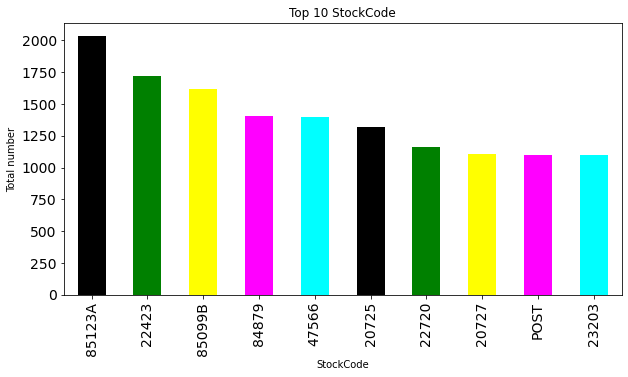

In [ ]:
#Top 10 Stockcode which sold maximum(volume-wised)
ax = dataset['StockCode'].value_counts().sort_values(ascending=False)[0:10].plot.bar(
    figsize = (10,5),
    fontsize = 14,
    color=['black', 'green', 'yellow','magenta','cyan','black', 'green', 'yellow','magenta','cyan'])
plt.title('Top 10 StockCode')
plt.xlabel('StockCode')

plt.ylabel('Total number');

**From the above bar graph stock code 85123A sold the highest**


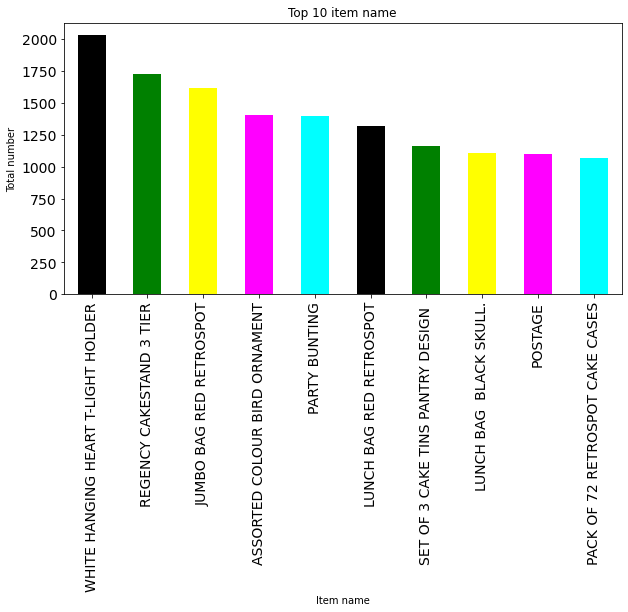

In [ ]:
#Top 10 item which sold maximum(volume-wised)
ax = dataset['Description'].value_counts().sort_values(ascending=False)[0:10].plot.bar(
    figsize = (10,5),
    fontsize = 14,
    color=['black', 'green', 'yellow','magenta','cyan','black', 'green', 'yellow','magenta','cyan'])

plt.title('Top 10 item name')
plt.xlabel('Item name')

plt.ylabel('Total number');

**White Hanging heart T-Light holder item sold the highest amongs the other items**

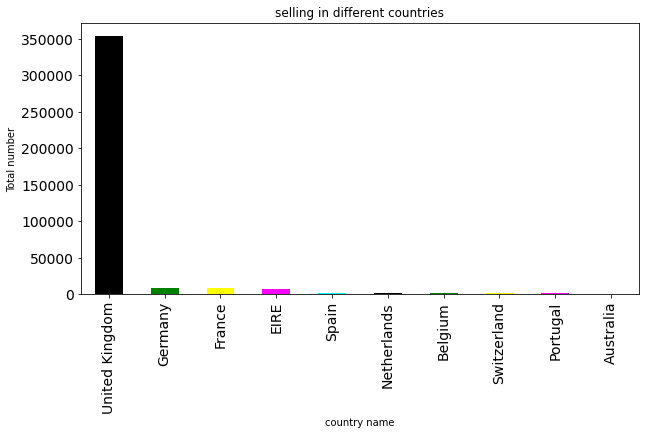

In [ ]:
#Top 10 item which sold maximum(volume-wised)
ax = dataset['Country'].value_counts().sort_values(ascending=False)[0:10].plot.bar(
    figsize = (10,5),
    fontsize = 14,
    color=['black', 'green', 'yellow','magenta','cyan','black', 'green', 'yellow','magenta','cyan'])
plt.title('selling in different countries')
plt.xlabel('country name')

plt.ylabel('Total number');

**from the above result, Maximum sell of the store happened in UK**

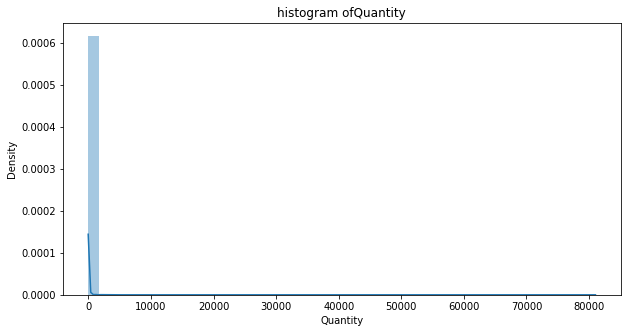

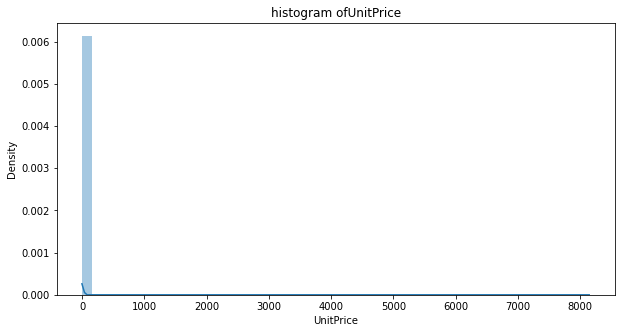

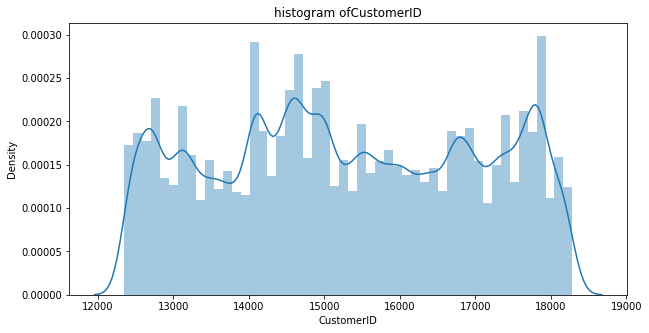

''

In [ ]:
for i in list(dataset.describe().columns):
  plt.rcParams['figure.figsize'] = (10, 5)
  plt.title('histogram of'+i)
  ax=sns.distplot((dataset[i]) )
  plt.show()
;

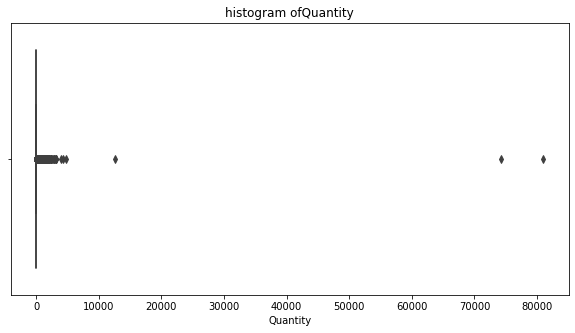

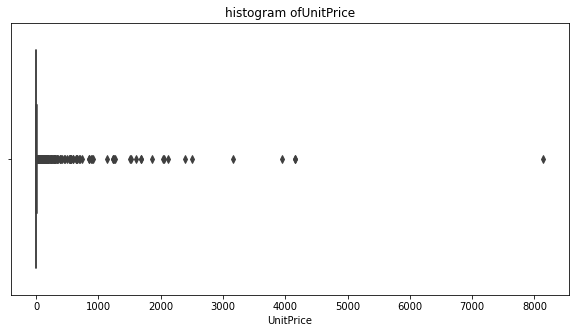

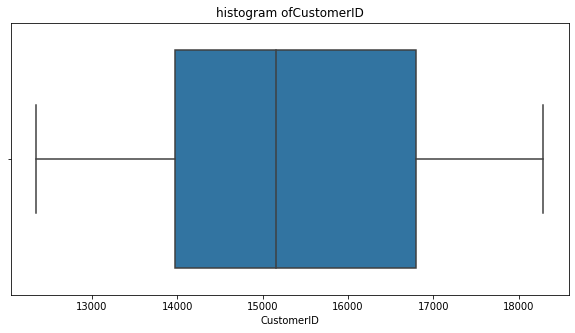

''

In [ ]:
for i in list(dataset.describe().columns):
  plt.rcParams['figure.figsize'] = (10, 5)
  plt.title('histogram of'+i)
  ax=sns.boxplot((dataset[i]) )
  plt.show()
;

# Feature Engineering

In [11]:
dataset['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 397924, dtype: datetime64[ns]

As we can see from invoice date we can extract so much information like time, what day, what month etc

In [12]:
# converting to relevent format
dataset["InvoiceDate"] = pd.to_datetime(dataset["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

In [13]:
# extracting the relevent data from date
dataset['month_name']=dataset.InvoiceDate.dt.month_name()
dataset['Day_name']=dataset.InvoiceDate.dt.day_name()
dataset['hour']=dataset.InvoiceDate.dt.hour
dataset['year']=dataset.InvoiceDate.dt.year
dataset['date']=dataset.InvoiceDate.dt.date

In [14]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month_name,Day_name,hour,year,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday,8,2010,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,2010,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,Wednesday,8,2010,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,2010,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,2010,2010-12-01


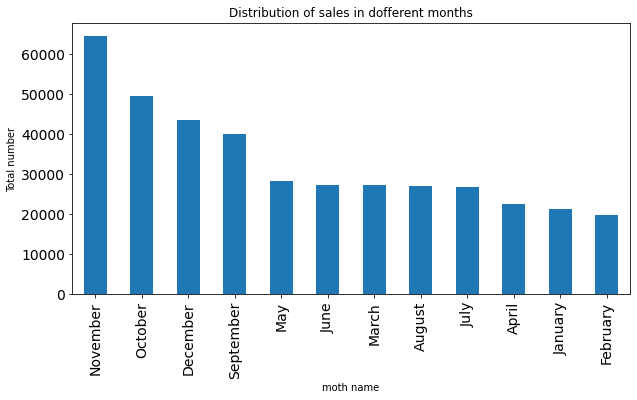

In [15]:
#which month got the maximum number of item sold
ax = dataset['month_name'].value_counts().sort_values(ascending=False)[0:12].plot.bar(
    figsize = (10,5),
    fontsize = 14,
   )
plt.title('Distribution of sales in dofferent months')
plt.xlabel('moth name')

plt.ylabel('Total number');

**From the above graph we can say in november, store evedencing the maximum sale.**

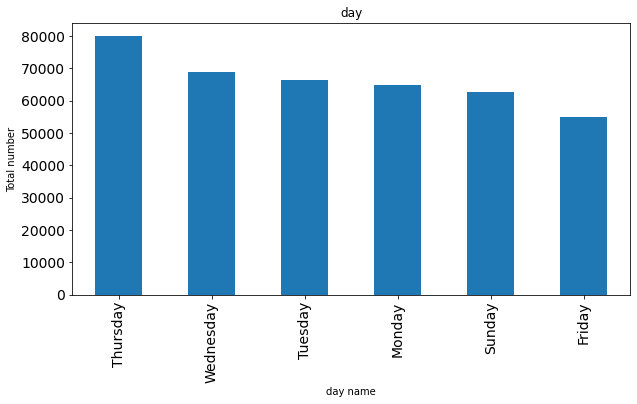

In [16]:
ax = dataset['Day_name'].value_counts().plot.bar(
    figsize = (10,5),
    fontsize = 14,
   )
plt.title('day')
plt.xlabel('day name')

plt.ylabel('Total number');

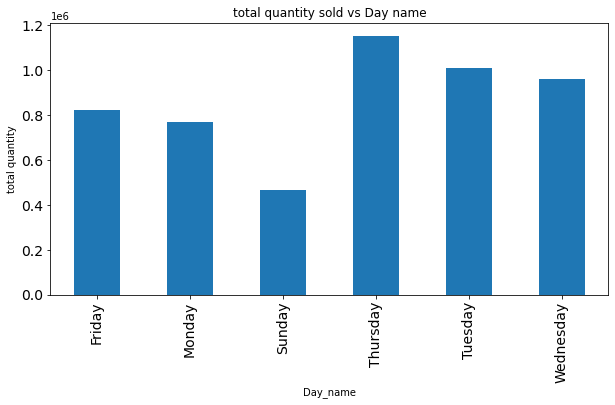

In [17]:
ax = dataset.groupby(['Day_name'])['Quantity'].sum().plot.bar(
    figsize = (10,5),
    fontsize = 14)
plt.title('total quantity sold vs Day name')
plt.xlabel('Day_name')

plt.ylabel('total quantity');

**From above 2 plots we can observe that on Thursday there are maximum number of sales and maximum customer buy on Thursday**

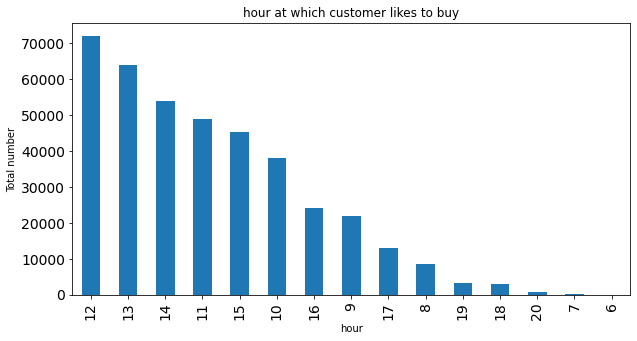

In [18]:
ax = dataset['hour'].value_counts().plot.bar(
    figsize = (10,5),
    fontsize = 14,
   )
plt.title('hour at which customer likes to buy')
plt.xlabel('hour')

plt.ylabel('Total number');

**At mid day 12 noon, customer likes to buy the most.**

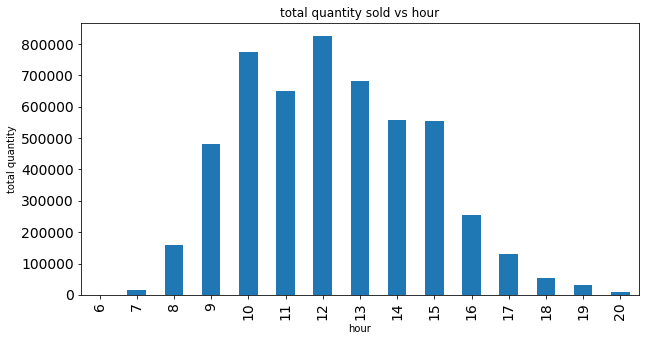

In [19]:
ax = dataset.groupby(['hour'])['Quantity'].sum().plot.bar(
    figsize = (10,5),
    fontsize = 14)
plt.title('total quantity sold vs hour')
plt.xlabel('hour')

plt.ylabel('total quantity');

**Total quantity also sold at 12 noon.**

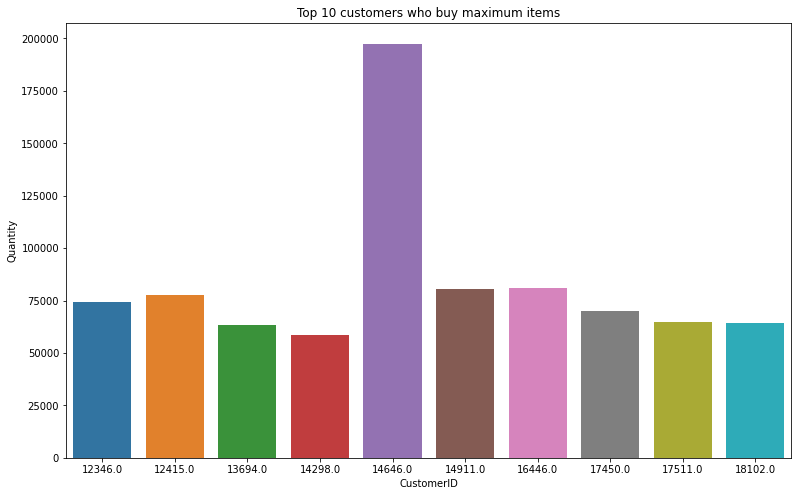

In [20]:
customer_top10= dataset.groupby(['CustomerID'])['Quantity'].sum().sort_values(ascending=False).reset_index()[0:10]

plt.figure(figsize=(13,8))
plt.title('Top 10 customers who buy maximum items')
sns.barplot(x='CustomerID',y='Quantity',data=customer_top10);

**Customer who have customerID 14646 bought the maximum quantity.**

In [21]:
dataset.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'month_name', 'Day_name', 'hour',
       'year', 'date'],
      dtype='object')

with the help of unit price and quantity , we can get the total amount spent.

In [22]:
dataset['total_amount']=dataset['Quantity']*dataset['UnitPrice']

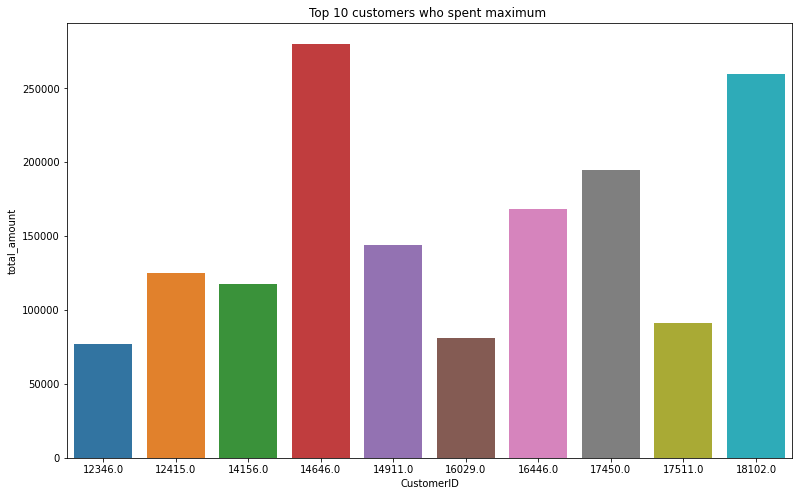

In [23]:
customer_top10_spent= dataset.groupby(['CustomerID'])['total_amount'].sum().sort_values(ascending=False).reset_index()[0:10]

plt.figure(figsize=(13,8))
plt.title('Top 10 customers who spent maximum ')
sns.barplot(x='CustomerID',y='total_amount',data=customer_top10_spent);

**customerID 14646 also spent the maximum amount.**

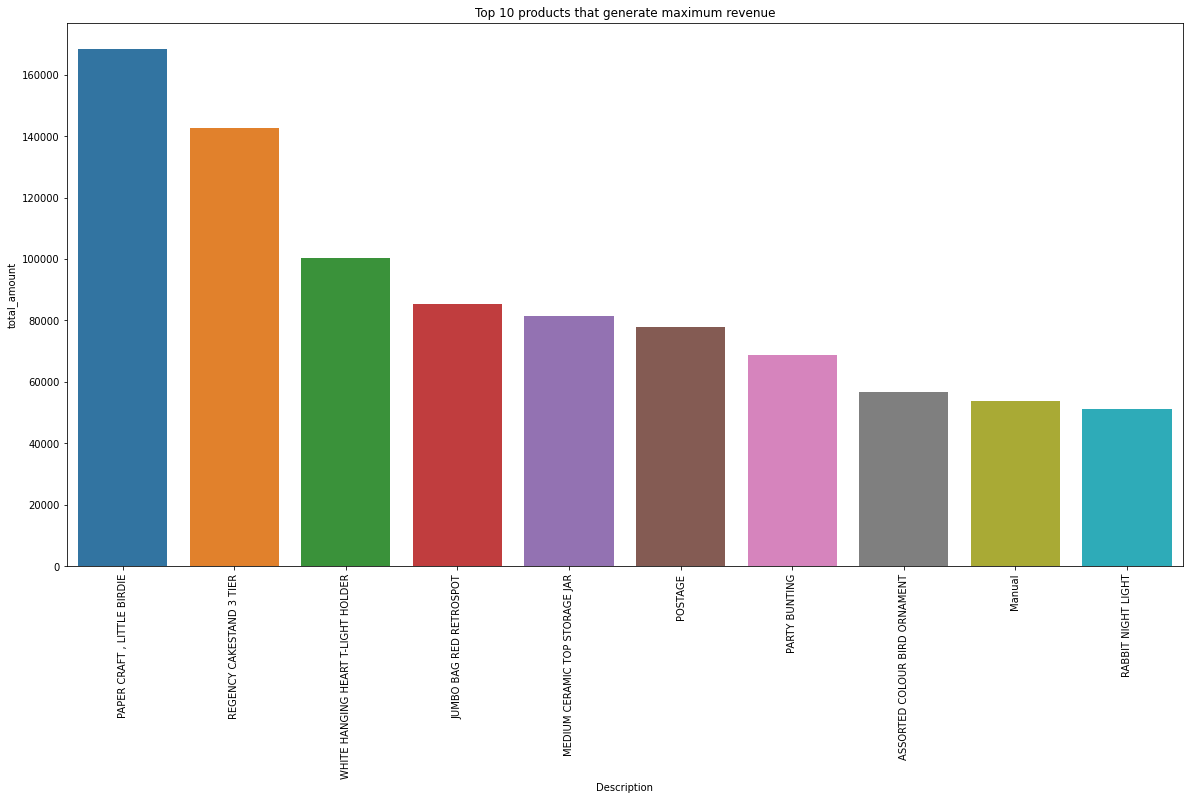

In [24]:
product_top10_revenue= dataset.groupby(['Description'])['total_amount'].sum().sort_values(ascending=False).reset_index()[0:10]

plt.figure(figsize=(20,10))
plt.title('Top 10 products that generate maximum revenue')

plot=sns.barplot(x='Description',y='total_amount',data=product_top10_revenue,)

plt.setp(plot.get_xticklabels(), rotation=90);

**"Paper Craft, Little Birdie" product produced the maximum revenue.**

# RFM model(Recency, Frequency, Monetary values)

In [25]:
last_invoice_date=dataset['date'].sort_values(ascending=False)[0:1].reset_index()
last_invoice_date

,index,date
0,541908,2011-12-09


In [26]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = dataset.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'total_amount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'total_amount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [27]:
#Descriptive Statistics
print('Recency stats')
print(rfm_df.Recency.describe())
print('Frequency stats')
print(rfm_df.Frequency.describe())
print('Monetory stats')
print(rfm_df.Monetary.describe())

Recency stats
count    4339.000000
mean       92.041484
std       100.007757
min         0.000000
25%        17.000000
50%        50.000000
75%       141.500000
max       373.000000
Name: Recency, dtype: float64
Frequency stats
count    4339.000000
mean       91.708689
std       228.792852
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64
Monetory stats
count      4339.000000
mean       2053.793018
std        8988.248381
min           0.000000
25%         307.245000
50%         674.450000
75%        1661.640000
max      280206.020000
Name: Monetary, dtype: float64


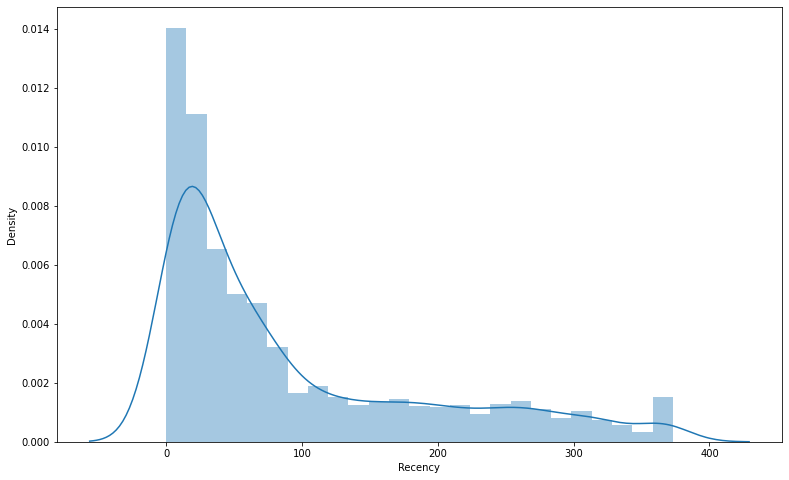

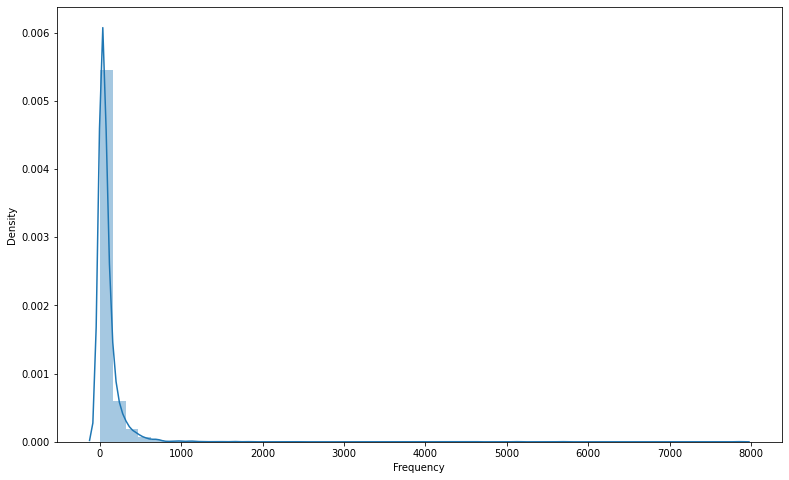

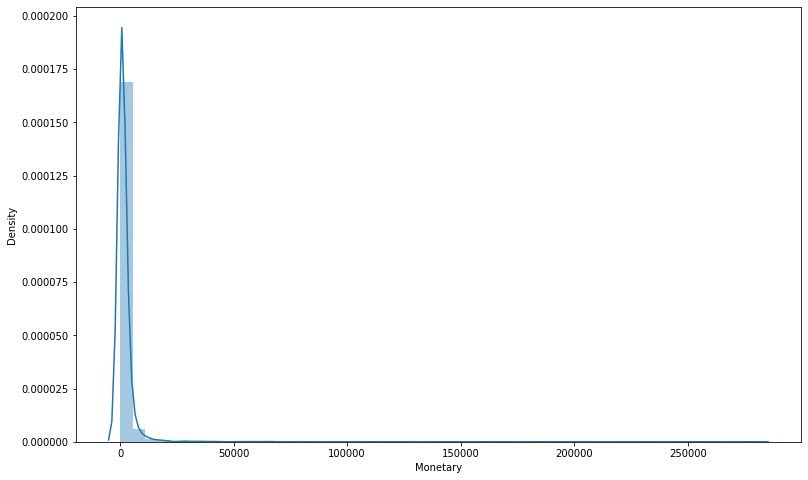

In [28]:
ls1=['Recency','Frequency','Monetary']
for i in ls1:
  x = rfm_df[i]
  plt.figure(figsize=(13,8))
  sns.distplot(x)

**As we can see from the histogram apart from recency other two are highly skewed**

#Split into four segments using quantiles

**We can split it into any quantiles its upto us. i took 4.**

In [29]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [30]:
quantiles

{'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.24499999999995, 0.5: 674.4499999999998, 0.75: 1661.64},
 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5}}

In [31]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [32]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [33]:

#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


**RFM Group (lowest the score best customer it is.) same for RFMscore.**

In [34]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

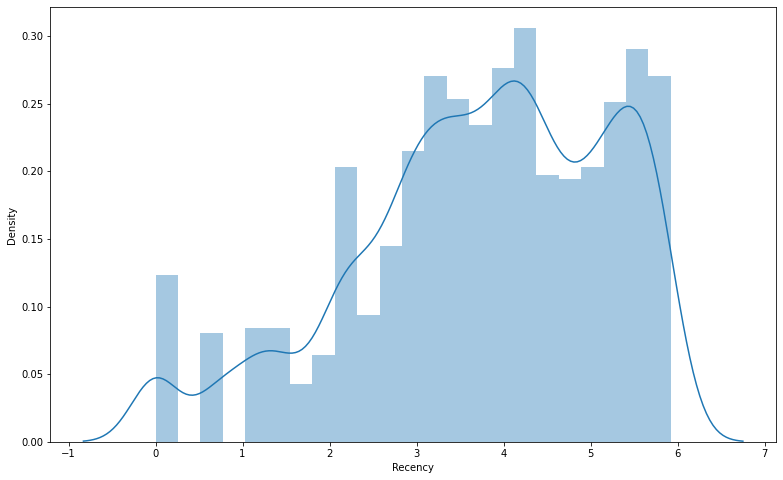

In [35]:

#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(13,8))
sns.distplot(Recency_Plot)

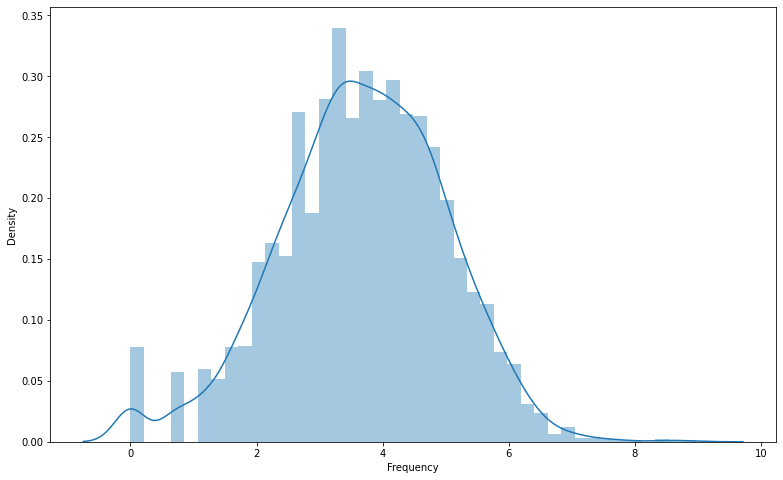

In [36]:

#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(Frequency_Plot)

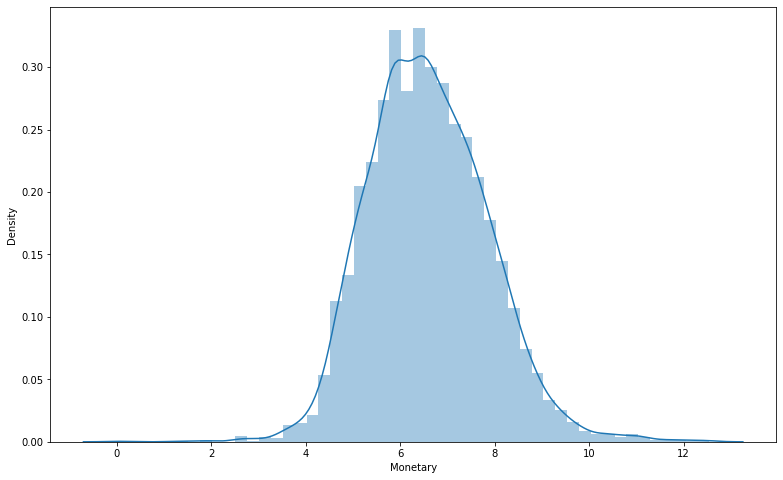

In [37]:

#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(Monetary_Plot)

**I did a log transformation to make our RFM features into a normal distribution**

In [38]:

rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

# K-means Clustering

We can take any of them i.e, Recency,Frequency, Monetary. Its Varies from companies to companies like some take Recency and monetary, some take Frequecy and monetary some take all the three.. its totally depends on them.

##Applying K means on all three.

### Applying Elbow method to find the correct number of clusters.

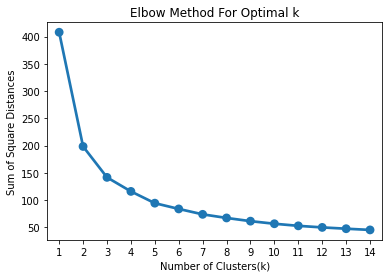

In [43]:
features_rec_mon=['Recency_log','Frequency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.MinMaxScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Applying silhouette score

In [40]:
features_fre_mon=['Frequency_log','Frequency_log','Monetary_log']
X_features_fre_mon=rfm_df[features_fre_mon].values
scaler_fre_mon=preprocessing.MinMaxScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
s_score=[]
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    s_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.49826838114397054
For n_clusters = 3, silhouette score is 0.4483006491773253
For n_clusters = 4, silhouette score is 0.41062756677196627
For n_clusters = 5, silhouette score is 0.3954690288141162
For n_clusters = 6, silhouette score is 0.3747997438402796
For n_clusters = 7, silhouette score is 0.3427504274385672
For n_clusters = 8, silhouette score is 0.34752996817797044
For n_clusters = 9, silhouette score is 0.35601678603198805
For n_clusters = 10, silhouette score is 0.34213636563593564
For n_clusters = 11, silhouette score is 0.3601858426188325
For n_clusters = 12, silhouette score is 0.35204269499394364
For n_clusters = 13, silhouette score is 0.347672719125785
For n_clusters = 14, silhouette score is 0.35594652622330686
For n_clusters = 15, silhouette score is 0.35903786744700633


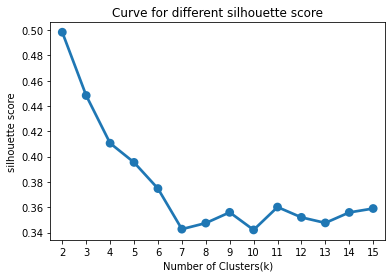

In [41]:
sns.pointplot(x = range_n_clusters, y =s_score)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('silhouette score')
plt.title('Curve for different silhouette score')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.42976306286085697
For n_clusters = 3 The average silhouette_score is : 0.3577868274376809
For n_clusters = 4 The average silhouette_score is : 0.33968730396754565
For n_clusters = 5 The average silhouette_score is : 0.32945446465418116
For n_clusters = 6 The average silhouette_score is : 0.2997468291378853
For n_clusters = 7 The average silhouette_score is : 0.3004504599887798
For n_clusters = 8 The average silhouette_score is : 0.29395262046737247
For n_clusters = 9 The average silhouette_score is : 0.29689777679531826
For n_clusters = 10 The average silhouette_score is : 0.2897282310383376
For n_clusters = 11 The average silhouette_score is : 0.28689878261042495
For n_clusters = 12 The average silhouette_score is : 0.2843288827470483
For n_clusters = 13 The average silhouette_score is : 0.26951792124769186
For n_clusters = 14 The average silhouette_score is : 0.2769516043564658


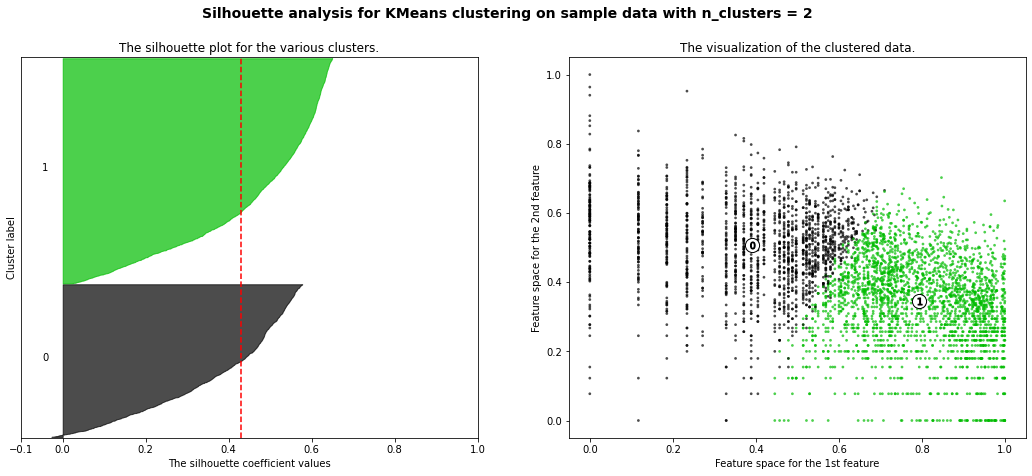

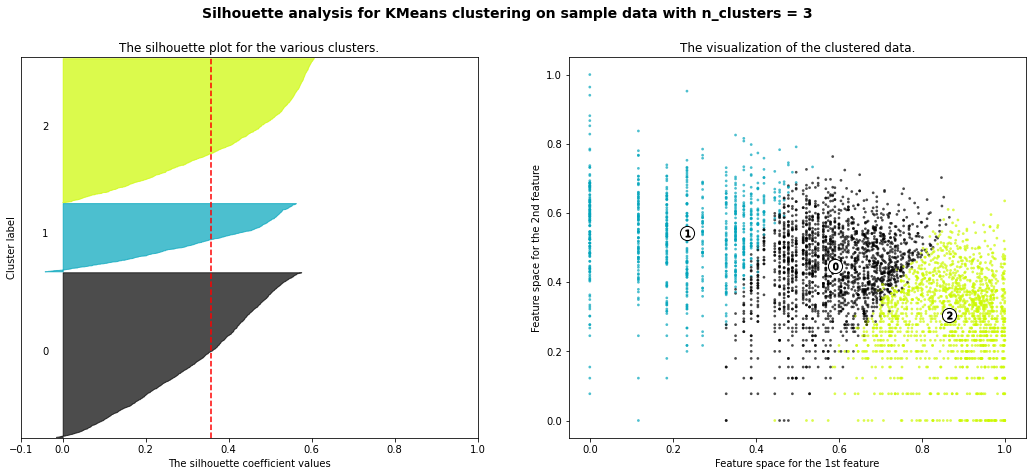

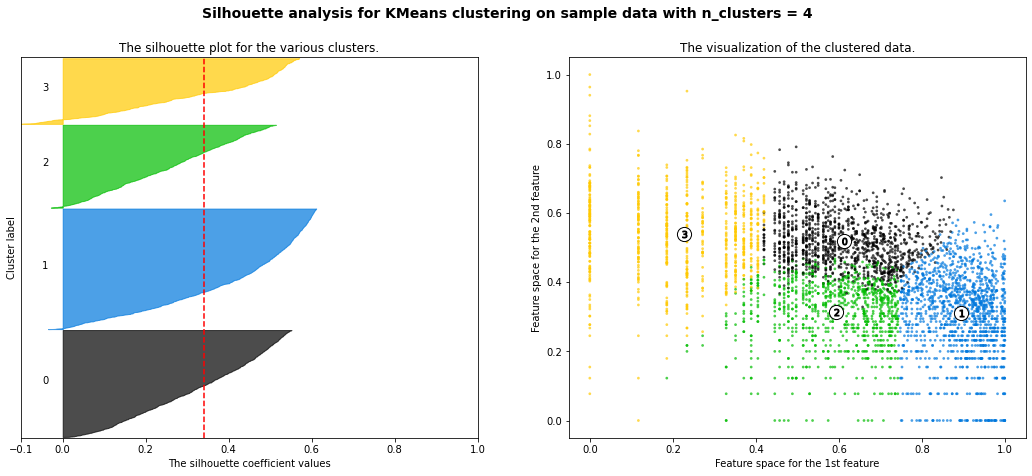

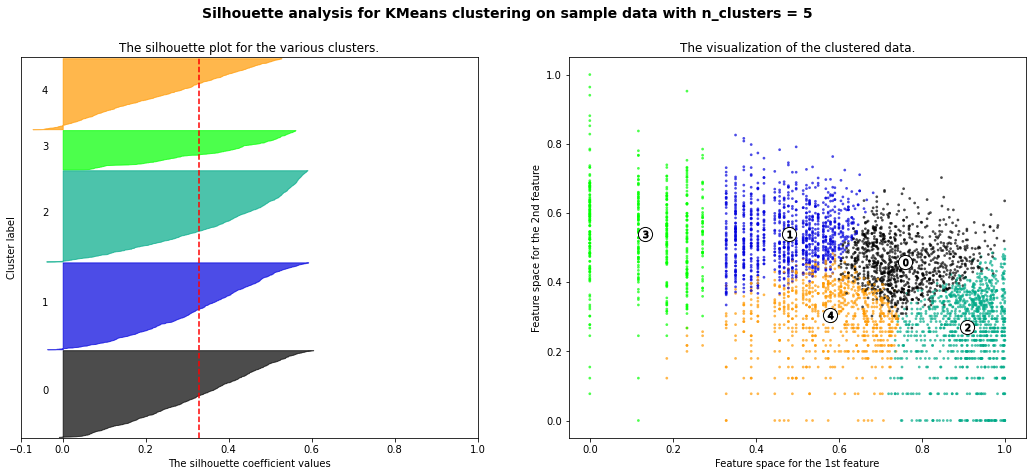

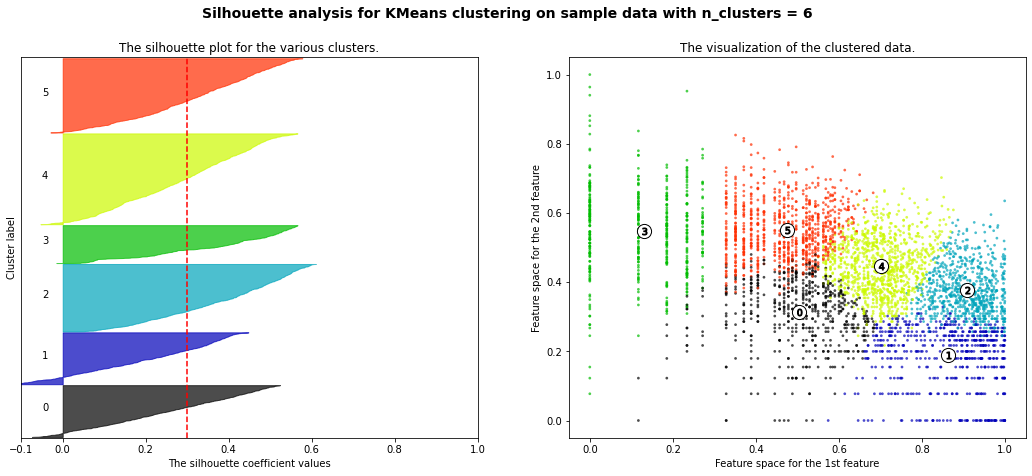

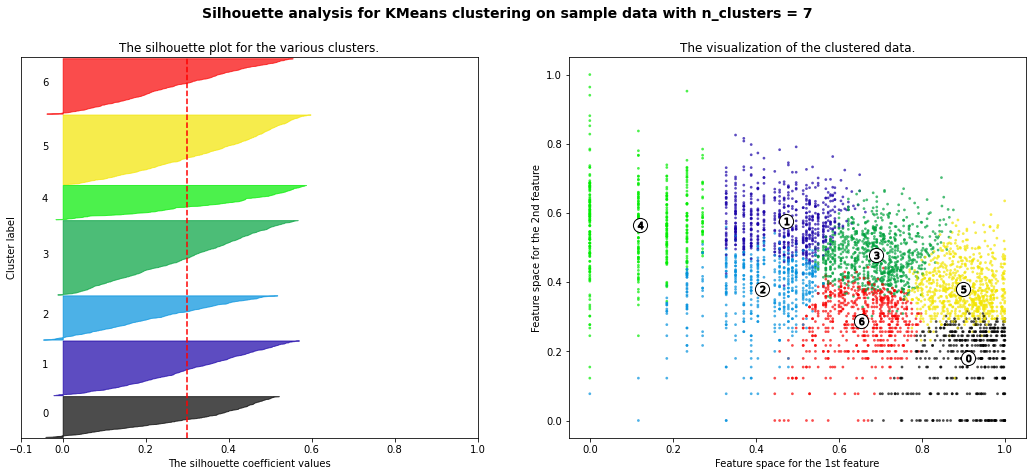

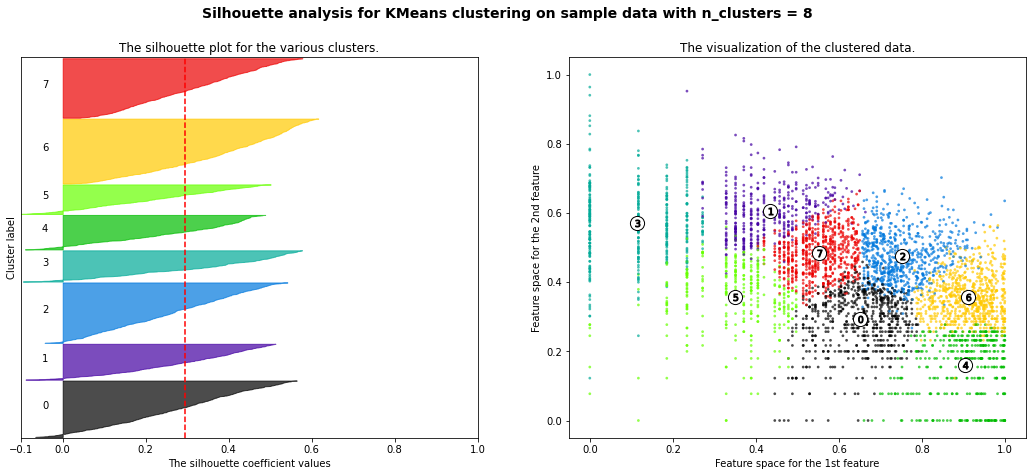

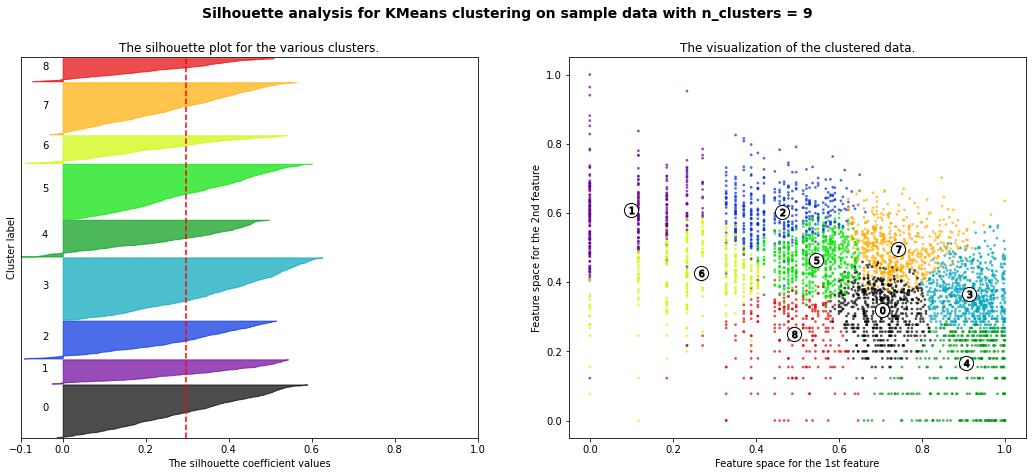

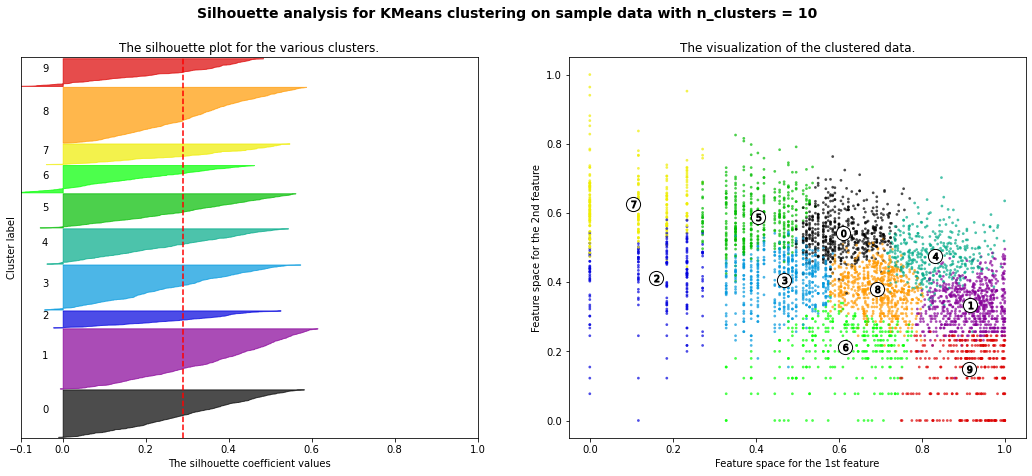

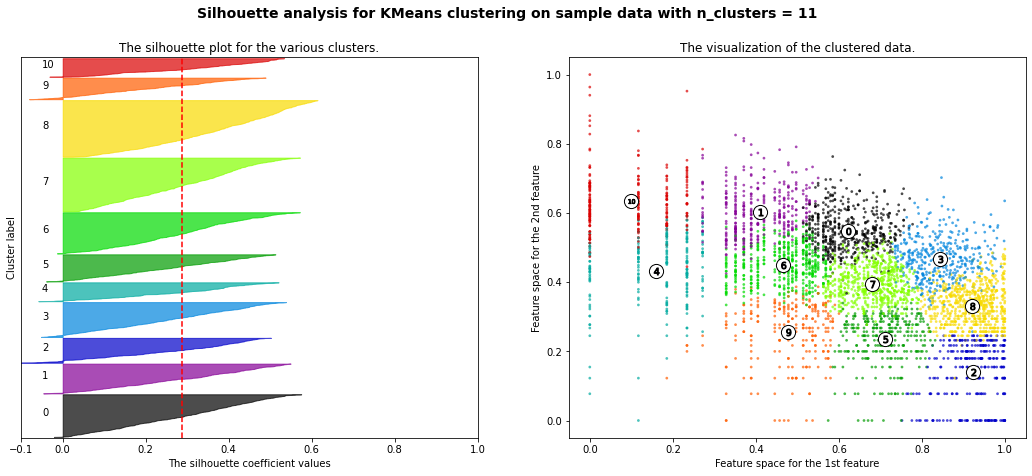

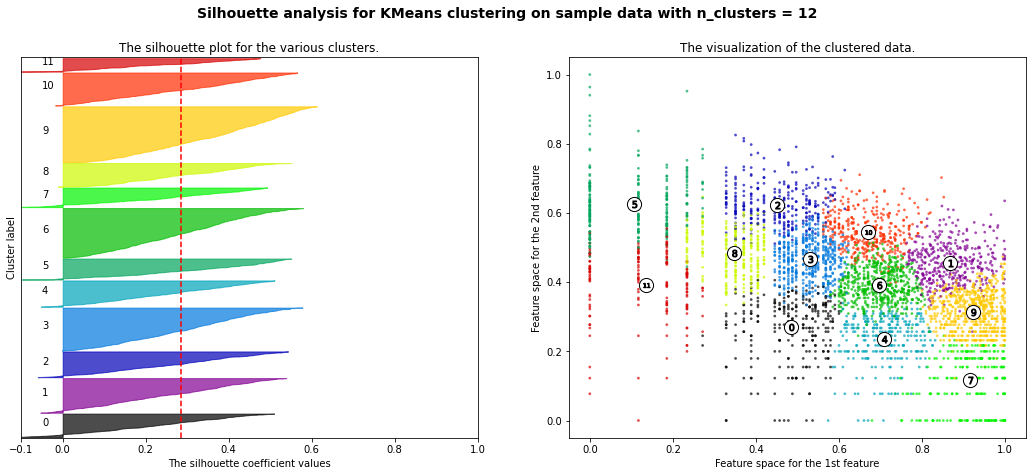

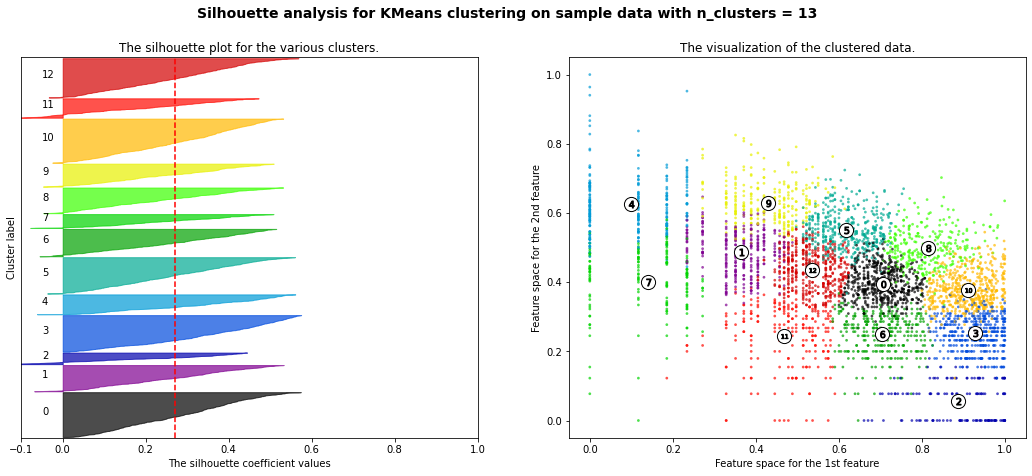

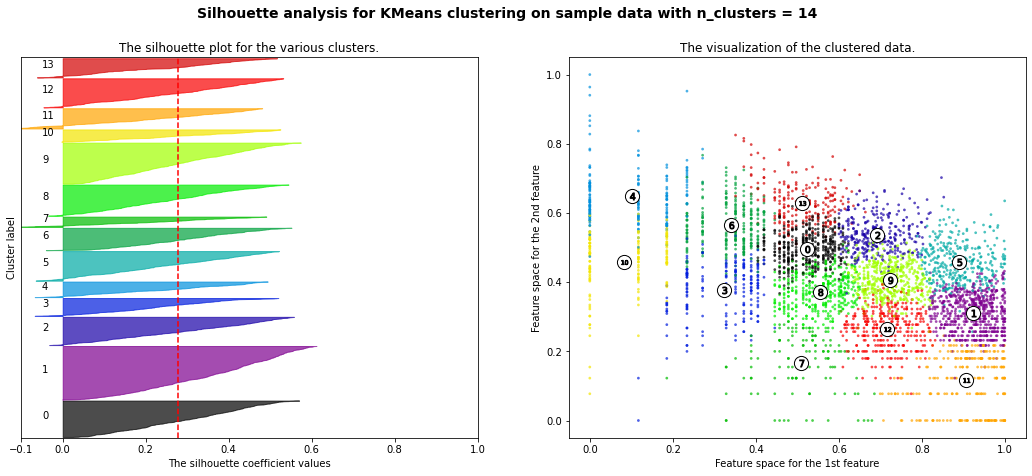

In [46]:
for n_clusters in range(2,15):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**From the above three observed results by silhouette score and elbow curve I can say that 2 number of clusters have the highest silhoutte score as well as true for elbow curve method**

### Plotting clusters in 3D


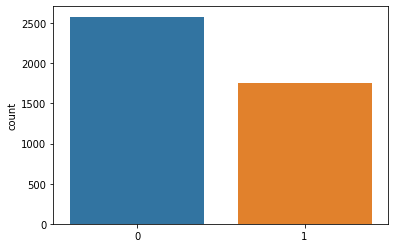

In [64]:

# finding the clusters based on input matrix "x"
model = KMeans(n_clusters = 2, init = "k-means++", max_iter = 1000, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(X)
sns.countplot(y_clusters);

In [65]:
#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = model.labels_
rfm_df.head(10)

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Recency_log,Frequency_log,Monetary_log,Cluster
CustomerID,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,5.783825,0.000000,11.253942,0
12347.0,2,182,4310.00,1,1,1,111,3,0.693147,5.204007,8.368693,1
12348.0,75,31,1797.24,3,3,1,331,7,4.317488,3.433987,7.494007,0
12349.0,18,73,1757.55,2,2,1,221,5,2.890372,4.290459,7.471676,1
12350.0,310,17,334.40,4,4,3,443,11,5.736572,2.833213,5.812338,0
12352.0,36,85,2506.04,2,2,1,221,5,3.583519,4.442651,7.826459,1
12353.0,204,4,89.00,4,4,4,444,12,5.318120,1.386294,4.488636,0
12354.0,232,58,1079.40,4,2,2,422,8,5.446737,4.060443,6.984161,0
12355.0,214,13,459.40,4,4,3,443,11,5.365976,2.564949,6.129921,0


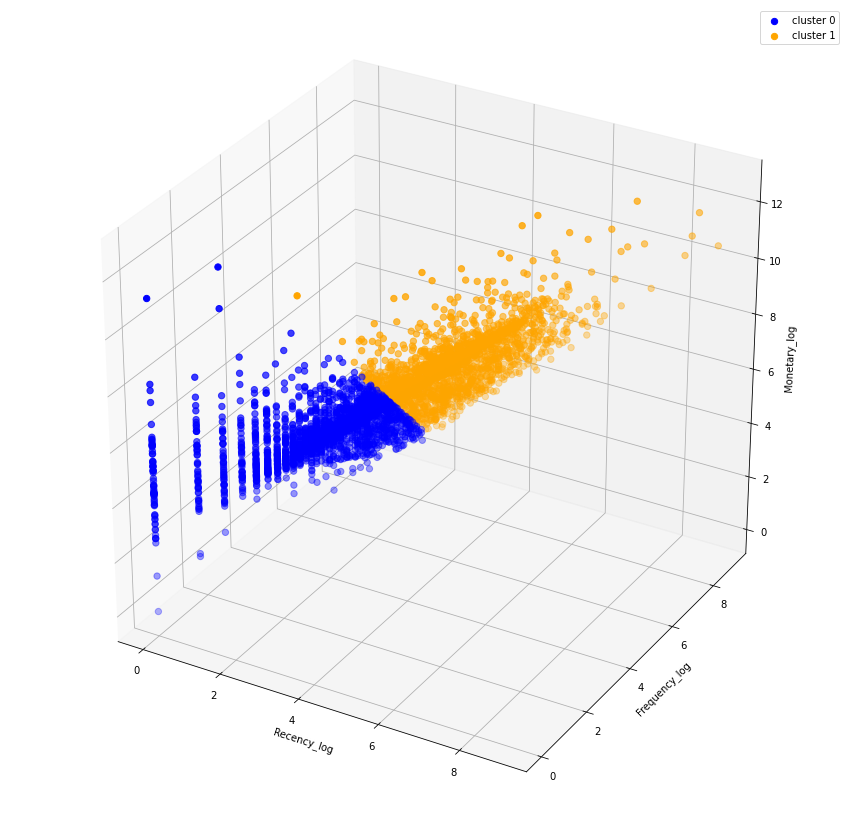

In [57]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_features_fre_mon[y_clusters == 0,0],X_features_fre_mon[y_clusters == 0,1],X_features_fre_mon[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(X_features_fre_mon[y_clusters == 1,0],X_features_fre_mon[y_clusters == 1,1],X_features_fre_mon[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.set_xlabel('Recency_log')
ax.set_ylabel('Frequency_log')
ax.set_zlabel('Monetary_log')
ax.legend()
plt.show()
plt.show()


# 